# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.isna().values.any()

False

In [6]:
data.duplicated().values.any()

False

In [7]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

In [8]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [10]:
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for i in columns_to_clean:
    data[i] = pd.to_numeric(data[i].astype(str).str.replace('$', '').str.replace(',', ''))

C:\Users\argda\AppData\Local\Temp\ipykernel_9968\4104777314.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[i] = pd.to_numeric(data[i].astype(str).str.replace('$', '').str.replace(',', ''))


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [11]:
data['Release_Date'] = pd.to_datetime(data.Release_Date)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [13]:
USD_Production_Budget_Mean = data.USD_Production_Budget.mean().round(decimals=2)
USD_Production_Budget_Mean = '{:,.2f}'.format(USD_Production_Budget_Mean)

In [14]:
print(f'The average production budget of the films in the data set is ${USD_Production_Budget_Mean}.')

The average production budget of the films in the data set is $31,113,737.58.


In [15]:
Worldwide_Gross_Mean = data.USD_Worldwide_Gross.mean().round(decimals=2)
Worldwide_Gross_Mean = '{:,.2f}'.format(Worldwide_Gross_Mean)
print(f'The average worldwide gross revenue of films is ${Worldwide_Gross_Mean}.')

The average worldwide gross revenue of films is $88,855,421.96.


In [16]:
Worldwide_Domestic_Revenue_Min = data.USD_Worldwide_Gross.min().round(decimals=2)
Worldwide_Domestic_Revenue_Min = '{:,.2f}'.format(Worldwide_Domestic_Revenue_Min)
print(f'The minimum for worldwide revenue is ${Worldwide_Domestic_Revenue_Min}.')

The minimum for worldwide revenue is $0.00.


In [17]:
Domestic_Revenue_Min = data.USD_Domestic_Gross.mean().round(decimals=2)
Domestic_Revenue_Min = '{:,.2f}'.format(Domestic_Revenue_Min)
print(f'The minimum for domestic revenue is ${Domestic_Revenue_Min}.')

The minimum for domestic revenue is $41,235,519.44.


In [18]:
twenty_five_quantile_gross = data.USD_Domestic_Gross.quantile(.25) + data.USD_Worldwide_Gross.quantile(.25)

In [19]:
twenty_five_quantile_margin = '{:,.2f}'.format(twenty_five_quantile_gross - data.USD_Production_Budget.quantile(.25))

In [20]:
print(f'It seems that the bottom 25% of films are making money, and in this case the the gain is about ${twenty_five_quantile_margin}.')

It seems that the bottom 25% of films are making money, and in this case the the gain is about $196,107.50.


In [21]:
highest_production_budget = '{:,.2f}'.format(data.USD_Production_Budget.max())
print(f'The highest production budget is ${highest_production_budget}.')

The highest production budget is $425,000,000.00.


In [22]:
highest_worldwide_gross = '{:,.2f}'.format(data.USD_Worldwide_Gross.max())
print(f'The highest worldwide gross of any film is ${highest_worldwide_gross}.')

The highest worldwide gross of any film is $2,783,918,982.00.


In [23]:
calc_margin_of_highest_budget_df = data[data['USD_Production_Budget'] == data.USD_Production_Budget.max()]
highest_budget_combined_gross = calc_margin_of_highest_budget_df['USD_Worldwide_Gross'].values + calc_margin_of_highest_budget_df['USD_Domestic_Gross'].values
calc_margin_of_highest_budget = '{:,.2f}'.format(highest_budget_combined_gross[0] - data.USD_Production_Budget.max())
print(f'Highest budget film which is Avatar made a tidy profit of ${calc_margin_of_highest_budget}.')

Highest budget film which is Avatar made a tidy profit of $3,119,426,607.00.


In [24]:
calc_margin_of_highest_worldwide_gross_df = data[data['USD_Worldwide_Gross'] == data.USD_Worldwide_Gross.max()]
calc_margin_of_highest_worldwide_gross_df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [25]:
print(f'By the look of it, highest worldwide gross film is also Avatar.  This means the revenue of ${calc_margin_of_highest_budget} is the same for highest budget film and highest worldwide gross film.')

By the look of it, highest worldwide gross film is also Avatar.  This means the revenue of $3,119,426,607.00 is the same for highest budget film and highest worldwide gross film.


In [26]:
lowest_budget_df = data[data['USD_Production_Budget'] == data.USD_Production_Budget.min()]
lowest_budget_df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [27]:
lowest_budget_total_gross = lowest_budget_df['USD_Worldwide_Gross'].values + lowest_budget_df['USD_Domestic_Gross'].values
lowest_budget_total_gross

array([362082], dtype=int64)

In [28]:
lowest_budget_margin = '{:,.2f}'.format(lowest_budget_total_gross[0] - data.USD_Production_Budget.min())
print(f'The revenue for the lowest budget film is ${lowest_budget_margin}.')
percentage_increase_for_lowest_budget_film_revenue = '{:,.2f}.'.format((float(lowest_budget_margin.replace(',', '')) - float(data.USD_Production_Budget.min()))/float(data.USD_Production_Budget.min())*float(100))
print(f'The revenue/margin percentage gain for lowest budget film, My Date With Drew, is about {percentage_increase_for_lowest_budget_film_revenue}%.')

The revenue for the lowest budget film is $360,982.00.
The revenue/margin percentage gain for lowest budget film, My Date With Drew, is about 32,716.55.%.


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [29]:
domestic_films_gross_of_0 = data[data['USD_Domestic_Gross'] == 0]

In [30]:
print(f'There are about {len(domestic_films_gross_of_0)} domestic films that are grossing at $0.')

There are about 512 domestic films that are grossing at $0.


In [31]:
print(f"It seems Singularity is the highest budget film that wastes about ${'{:,.2f}'.format(domestic_films_gross_of_0['USD_Production_Budget'].max())}, but this film grosses at $0.  This doesn't smell right.")
domestic_films_gross_of_0.sort_values(by='USD_Production_Budget', ascending=False).head(1)

It seems Singularity is the highest budget film that wastes about $175,000,000.00, but this film grosses at $0.  This doesn't smell right.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


In [32]:
print('Further digging reveals the film Singularity\'s release date is in the year of 2020, but the data is already calculating its revenue before the release date -- this means the film isn\'t yet making any money since it hasn\'t yet released.  This means that other high budget films that got $0 revenue could be falling into the same category as Singularity.')

Further digging reveals the film Singularity's release date is in the year of 2020, but the data is already calculating its revenue before the release date -- this means the film isn't yet making any money since it hasn't yet released.  This means that other high budget films that got $0 revenue could be falling into the same category as Singularity.


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [33]:
worldwide_films_gross_of_0 = data[data['USD_Worldwide_Gross'] == 0]

In [34]:
print(f'There are about {len(worldwide_films_gross_of_0)} worldwide films tat are grossing at $0.')

There are about 357 worldwide films tat are grossing at $0.


In [35]:
worldwide_films_gross_of_0.sort_values(by='USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [36]:
print(f'The dataframe above shows there are many films that gross $0 internationally.  Perhaps, these films aren\'t released worldwide?')

The dataframe above shows there are many films that gross $0 internationally.  Perhaps, these films aren't released worldwide?


### Filtering on Multiple Conditions

In [37]:
data.loc[(data['USD_Worldwide_Gross'] != 0) & (data['USD_Domestic_Gross'] == 0)].sort_values(by='USD_Worldwide_Gross', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0
...,...,...,...,...,...,...
5141,4076,2016-02-09,Yoga Hosers,5000000,2199,0
3573,5015,2010-01-26,B-Girl,700000,1160,0
5103,4625,2015-12-31,"To Be Frank, Sinatra at 100",2000000,926,0
4772,5005,2014-12-31,Destiny,750000,450,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [38]:
data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0').sort_values(by='USD_Worldwide_Gross', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0
...,...,...,...,...,...,...
5141,4076,2016-02-09,Yoga Hosers,5000000,2199,0
3573,5015,2010-01-26,B-Girl,700000,1160,0
5103,4625,2015-12-31,"To Be Frank, Sinatra at 100",2000000,926,0
4772,5005,2014-12-31,Destiny,750000,450,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [39]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [40]:
films_not_yet_released = data[data['Release_Date'] > scrape_date]

In [41]:
films_not_yet_released

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [42]:
print(f'It seems that there are {len(films_not_yet_released)} films that are not yet released.')

It seems that there are 7 films that are not yet released.


In [43]:
data_clean = data[data['Release_Date'] <= scrape_date]

In [44]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [45]:
films_costs_exceed_worldwide_gross = data_clean[data_clean['USD_Production_Budget'] > data_clean.USD_Worldwide_Gross]

In [46]:
percentage_of_films_with_costs_exceed_worldwide_gross = len(films_costs_exceed_worldwide_gross)/len(data_clean)*100

In [47]:
print(f'It seems there is {round(percentage_of_films_with_costs_exceed_worldwide_gross, 2)}% of films that have costs that exceed the worldwide gross revenue.')

It seems there is 37.28% of films that have costs that exceed the worldwide gross revenue.


# Seaborn for Data Viz: Bubble Charts

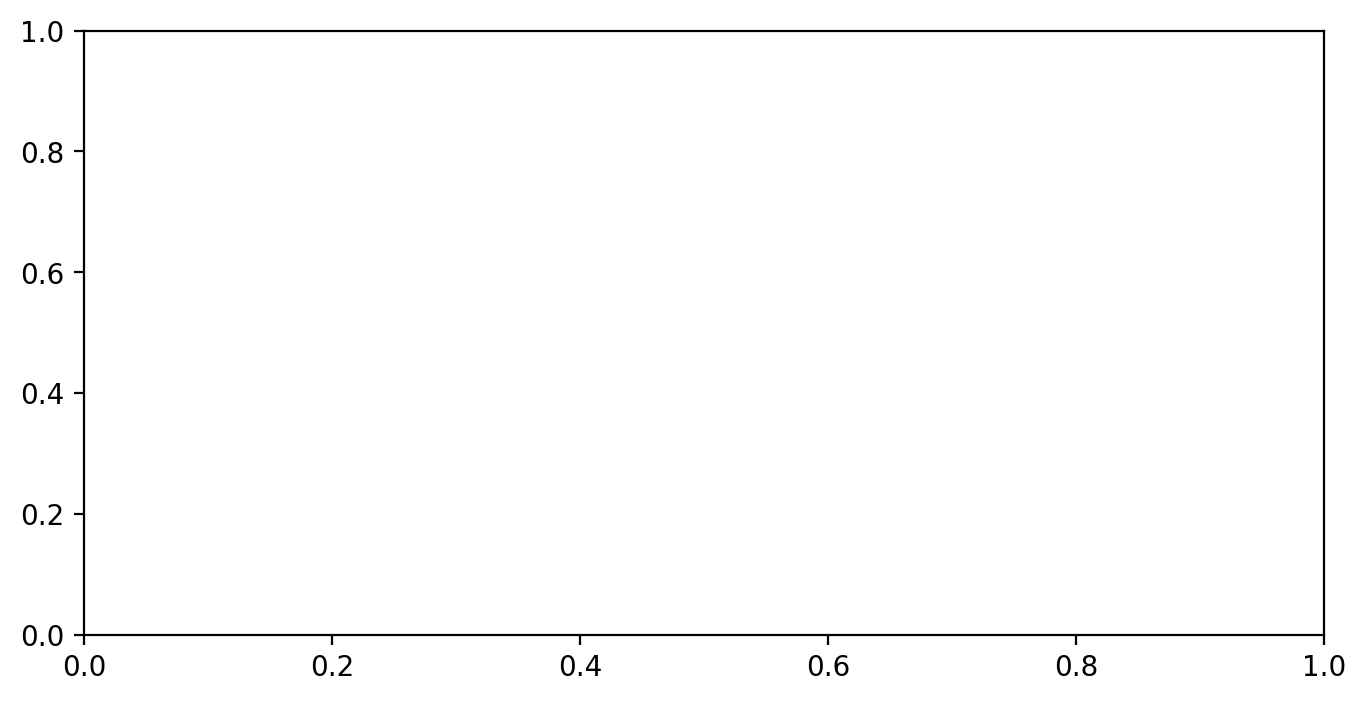

In [48]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200)

In [49]:
sns.scatterplot(ax=ax, data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

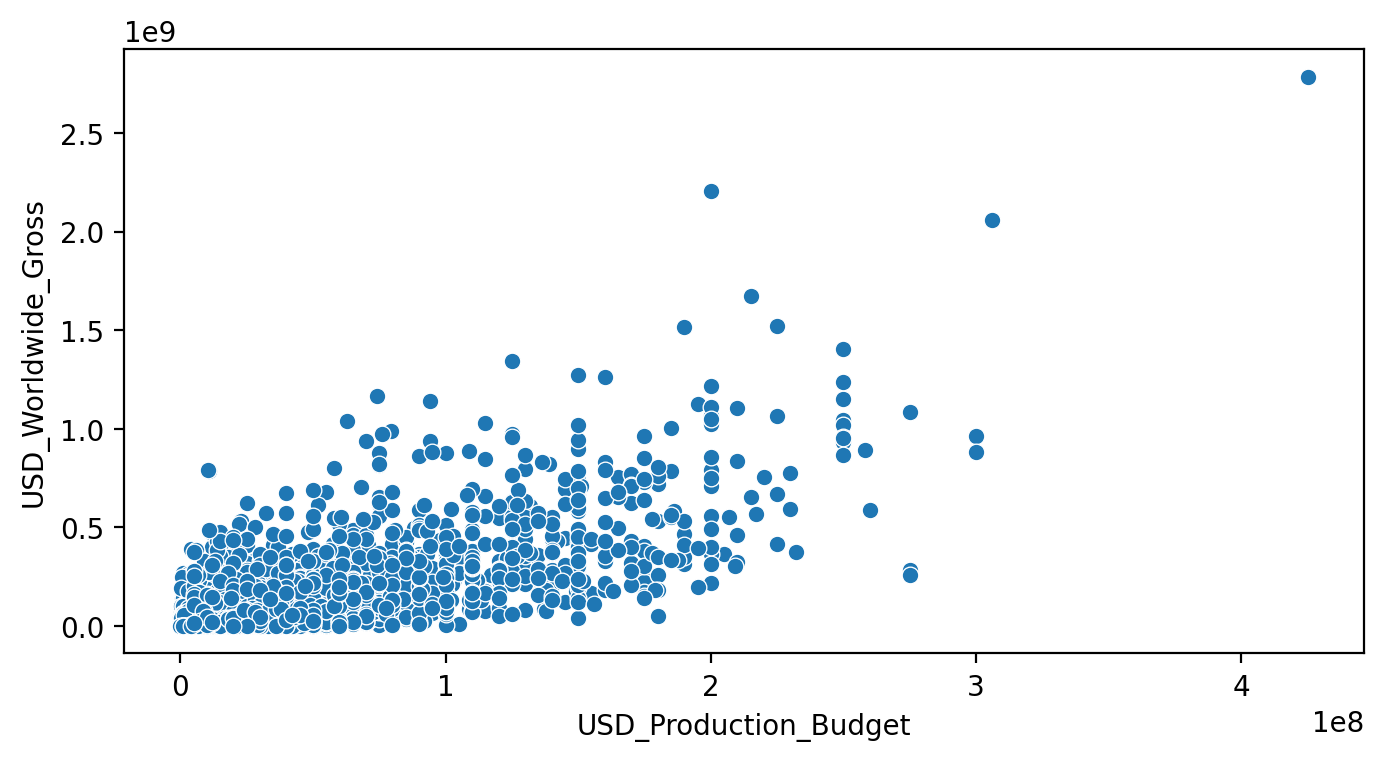

In [50]:
fig

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



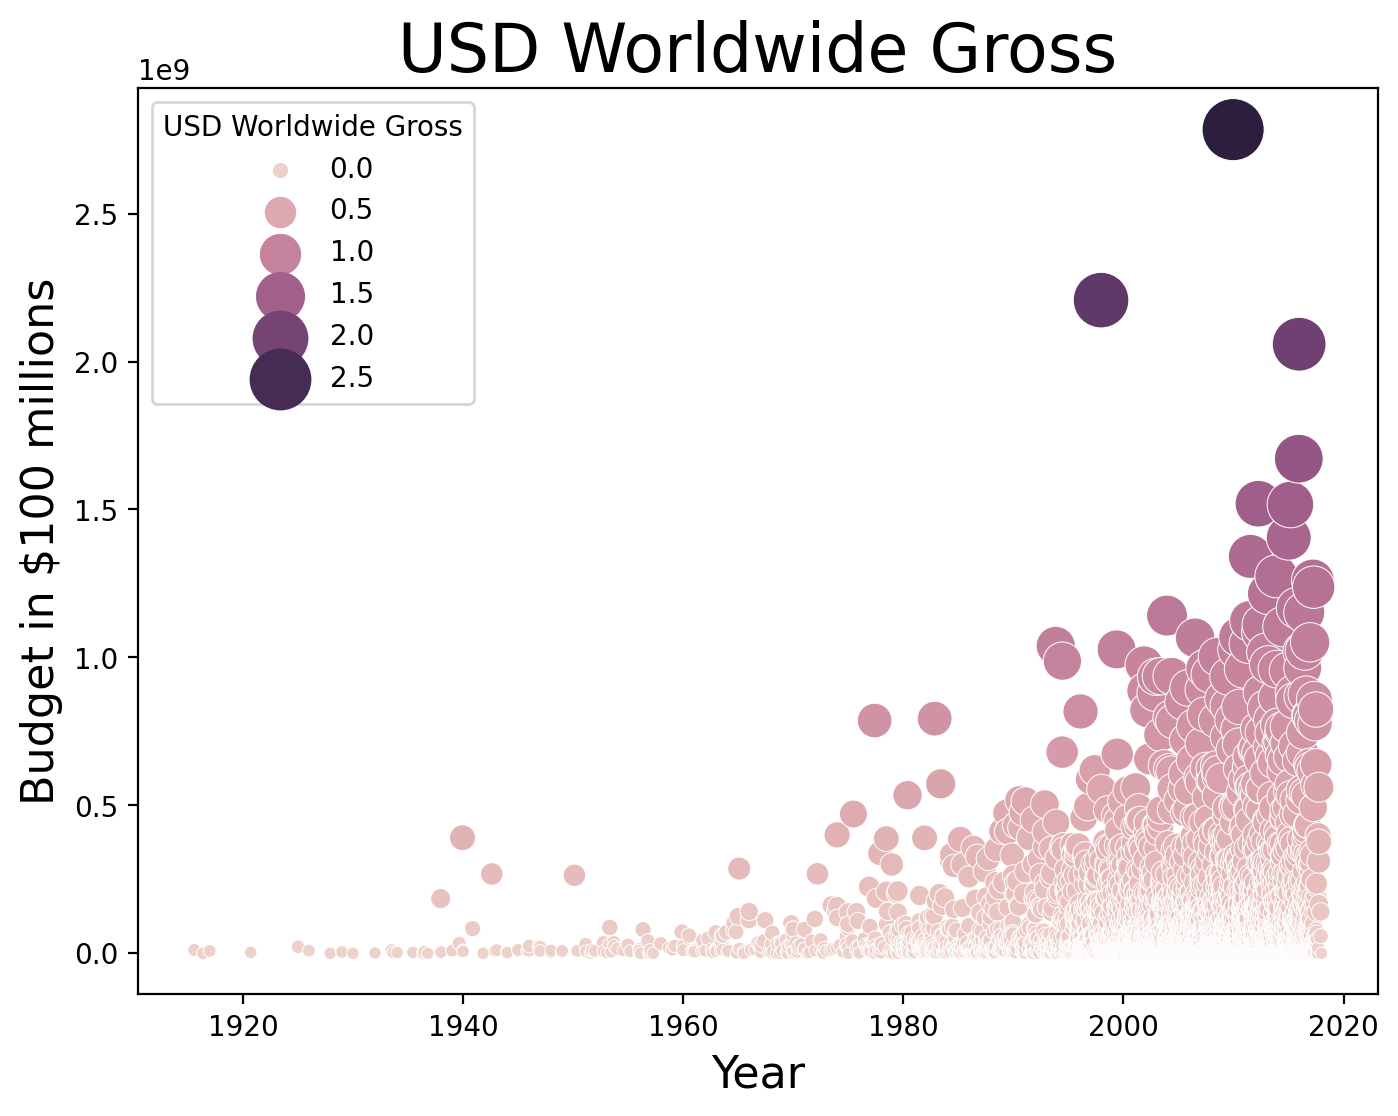

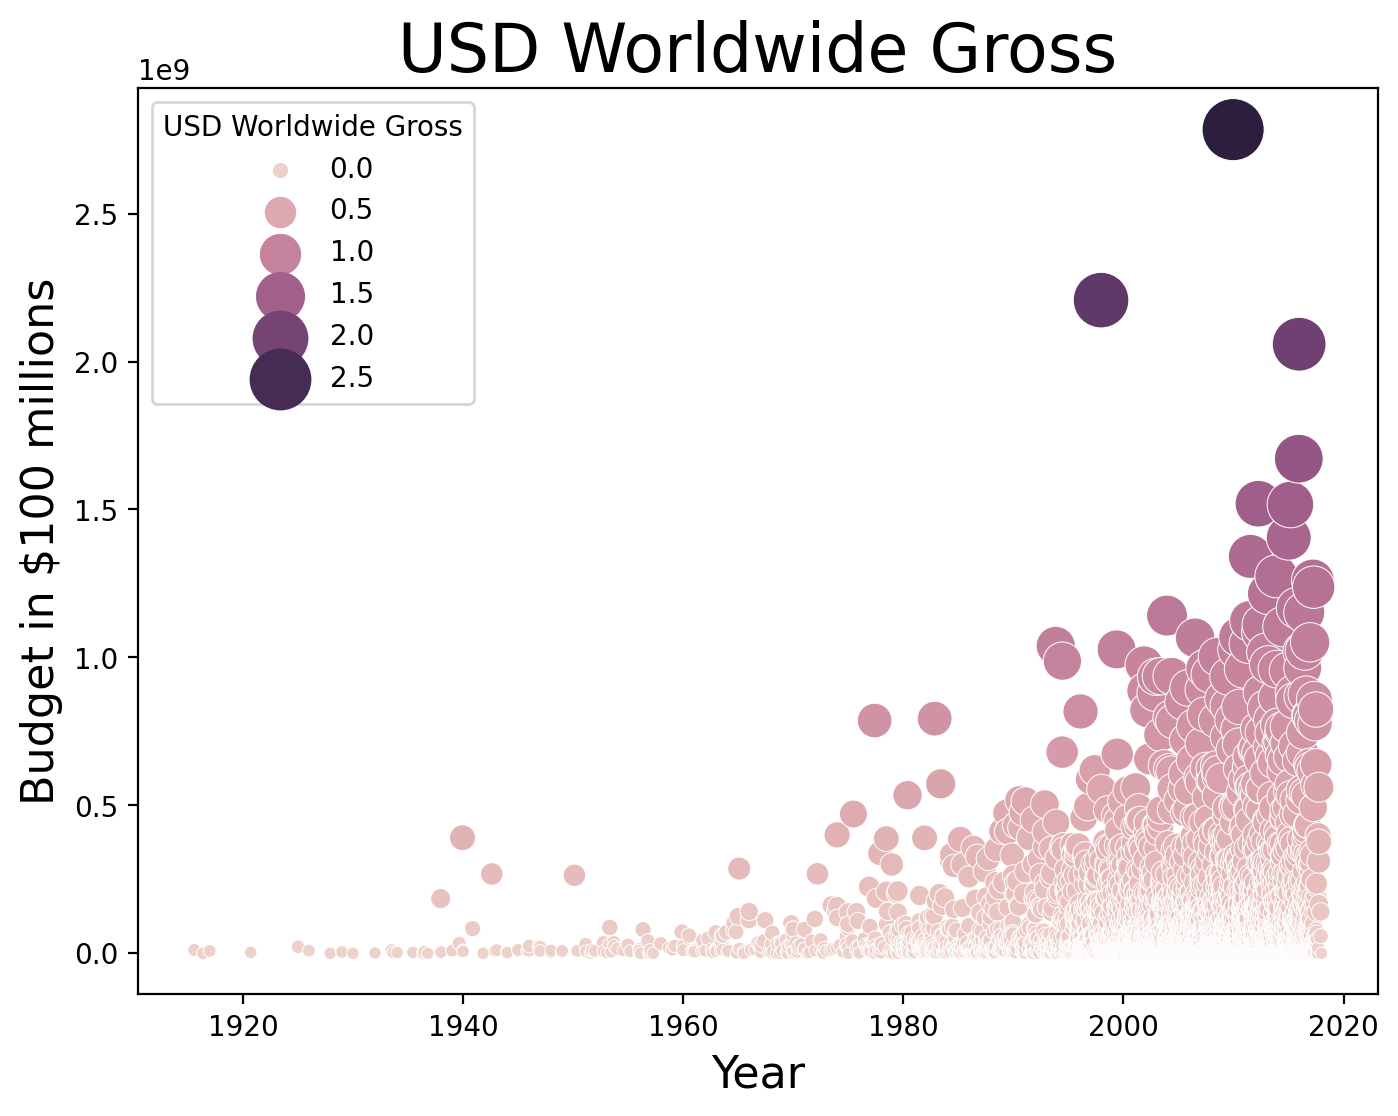

In [51]:
fig2, fig2_ax1 = plt.subplots(figsize=(8,6), dpi=200)
usd_worldwide_gross_bubbly = sns.scatterplot(ax=fig2_ax1, data=data_clean, x='Release_Date', y='USD_Worldwide_Gross', size='USD_Worldwide_Gross', sizes=(20, 500), hue='USD_Worldwide_Gross')
plt.xlabel('Year', size=16)
plt.ylabel('Budget in $100 millions', size=16)
plt.title("USD Worldwide Gross", size=24)
usd_worldwide_gross_bubbly.legend_.set_title('USD Worldwide Gross')
fig2

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [52]:
new_data_clean = data_clean.copy()

In [53]:
dates_to_be_transformed = pd.DatetimeIndex(new_data_clean['Release_Date'])
dates_to_be_transformed.year

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [54]:
new_data_clean['Decade'] = (dates_to_be_transformed.year // 10) * 10

In [55]:
new_data_clean.head(15)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,1920
6,4630,1927-12-08,Wings,2000000,0,0,1920
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000,1920
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930
9,5043,1931-12-31,Mata Hari,558000,900000,900000,1930


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [56]:
old_films = new_data_clean[new_data_clean['Decade'] <= 1969]

In [57]:
new_films = new_data_clean[new_data_clean['Decade'] >= 1970]

In [58]:
old_films.head(15)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,1920
6,4630,1927-12-08,Wings,2000000,0,0,1920
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000,1920
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930
9,5043,1931-12-31,Mata Hari,558000,900000,900000,1930


In [59]:
new_films.head(15)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970
158,4855,1970-01-01,Beyond the Valley of the Dolls,1000000,9000000,9000000,1970
159,5027,1970-03-26,Woodstock,600000,34505110,34505110,1970
160,4259,1970-05-13,The Ballad of Cable Hogue,3716946,5000000,3500000,1970
161,4349,1970-05-26,Beneath the Planet of the Apes,3000000,17489009,17489009,1970
162,2598,1970-06-24,Catch-22,18000000,24911670,24911670,1970


# Seaborn Regression Plots

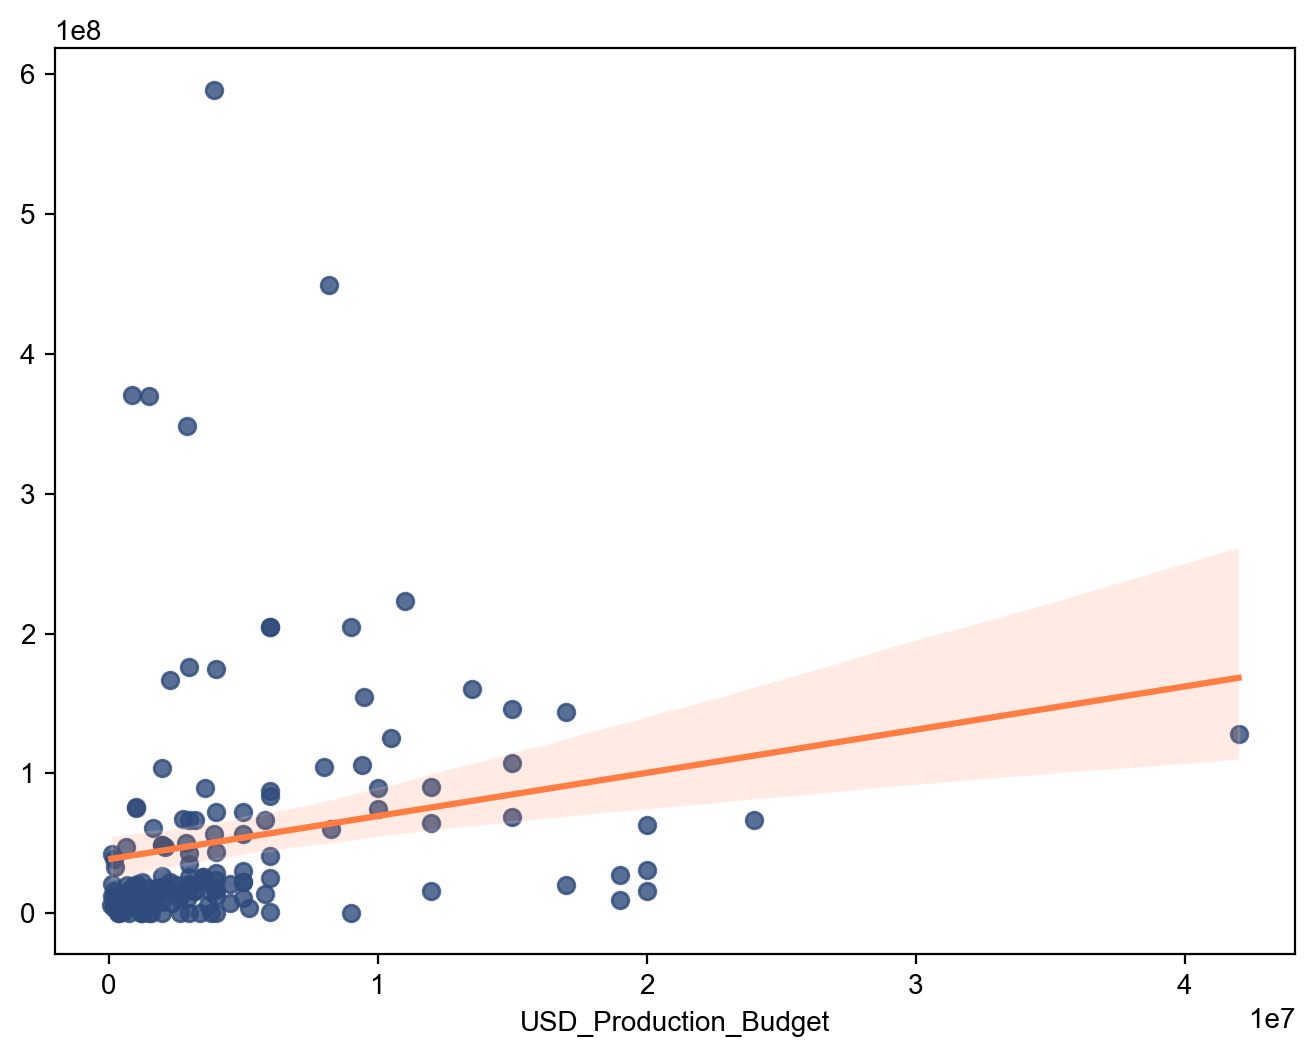

In [60]:
fig4, fig4_ax1 = plt.subplots(figsize=(8,6), dpi=200)
sns.regplot(ax=fig4_ax1, x='USD_Production_Budget', y=(old_films.USD_Domestic_Gross + old_films.USD_Worldwide_Gross),
           data=old_films, scatter_kws={'color': '#2f4b7c'}, line_kws={'color': '#ff7c43'})
sns.set_style('darkgrid')

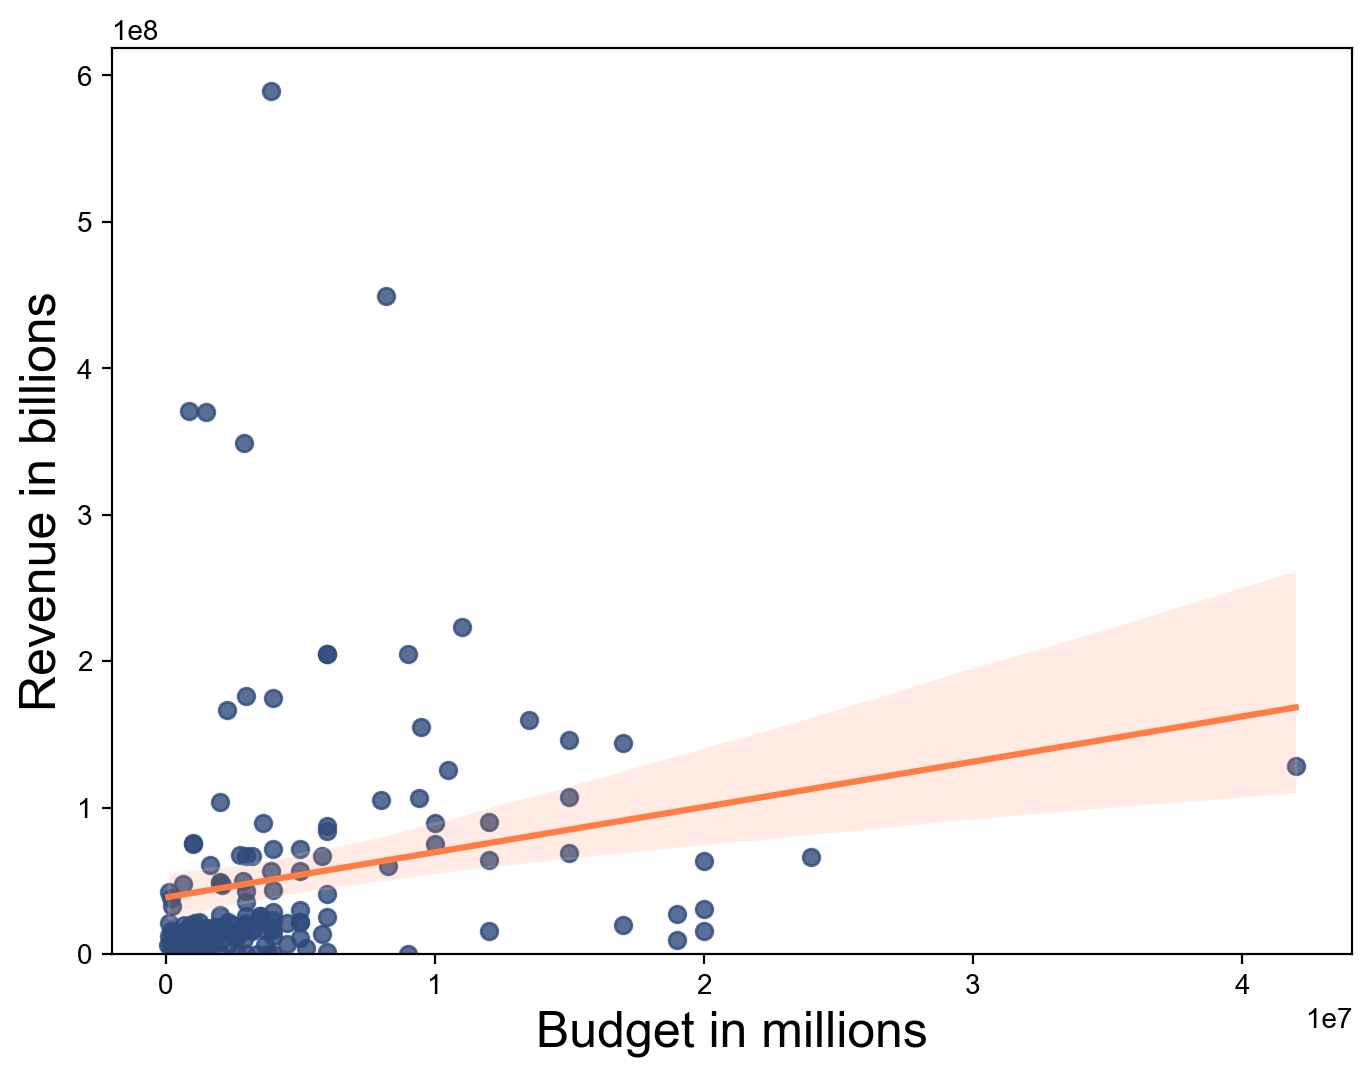

In [61]:
fig4_ax1.set_ylim(0, None)
fig4_ax1.set_xlabel('Budget in millions', fontsize=18)
fig4_ax1.set_ylabel('Revenue in billions', fontsize=18)
fig4

## Linear Regression Graph for New Films

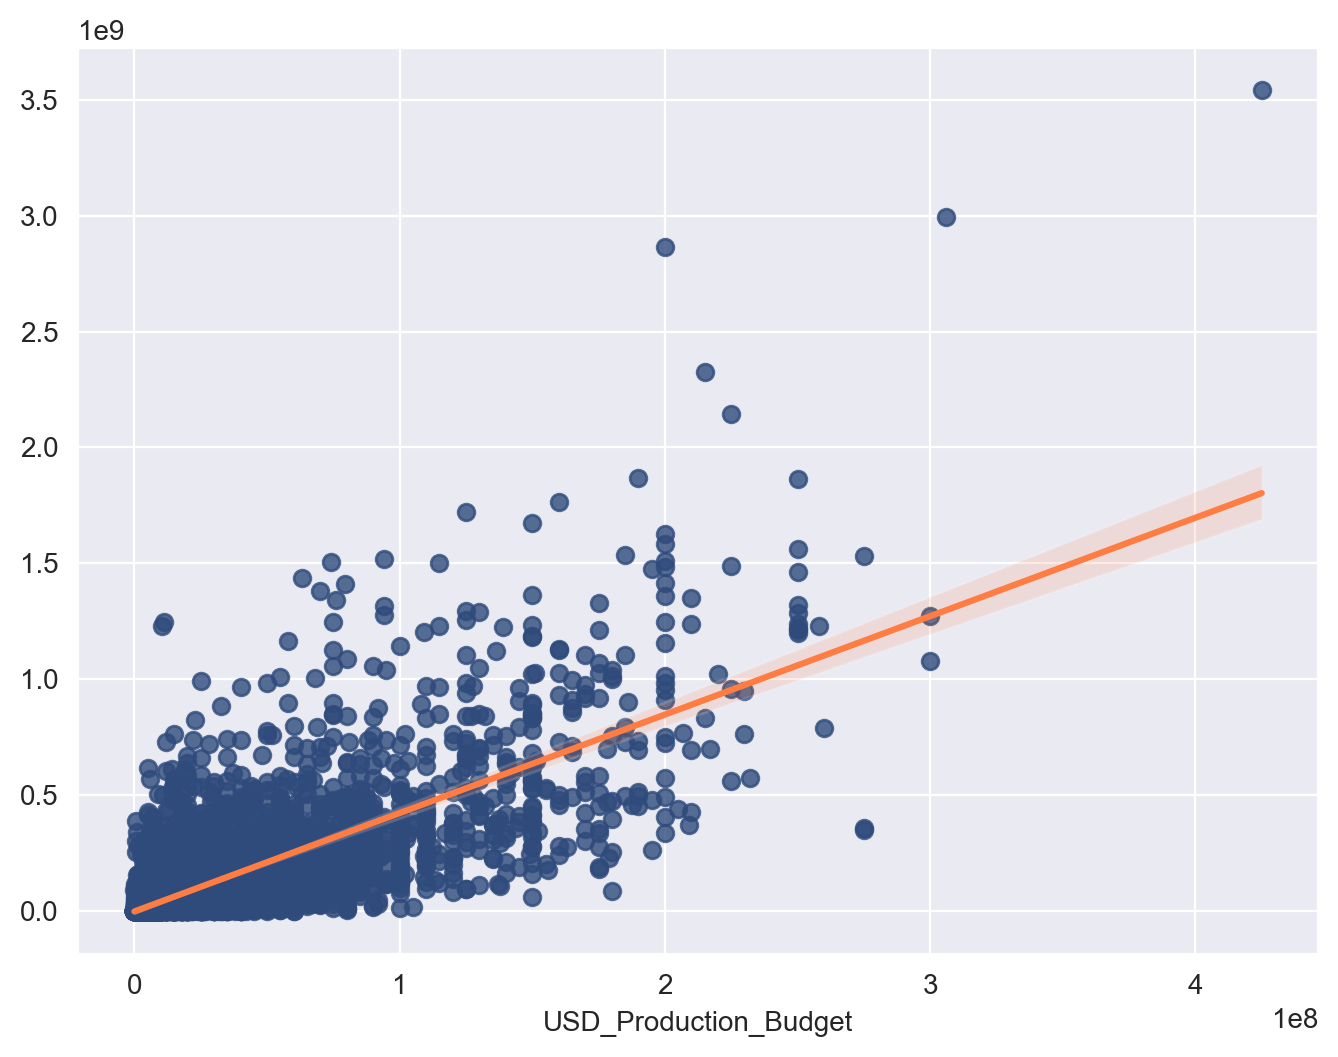

In [62]:
fig3, fig3_ax1 = plt.subplots(figsize=(8,6), dpi=200)
sns.regplot(ax=fig3_ax1, x='USD_Production_Budget', y=(new_films.USD_Domestic_Gross + new_films.USD_Worldwide_Gross),
           data=new_films, scatter_kws={"color": "#2f4b7c"}, line_kws={"color": "#ff7c43"})
sns.set_style('darkgrid')

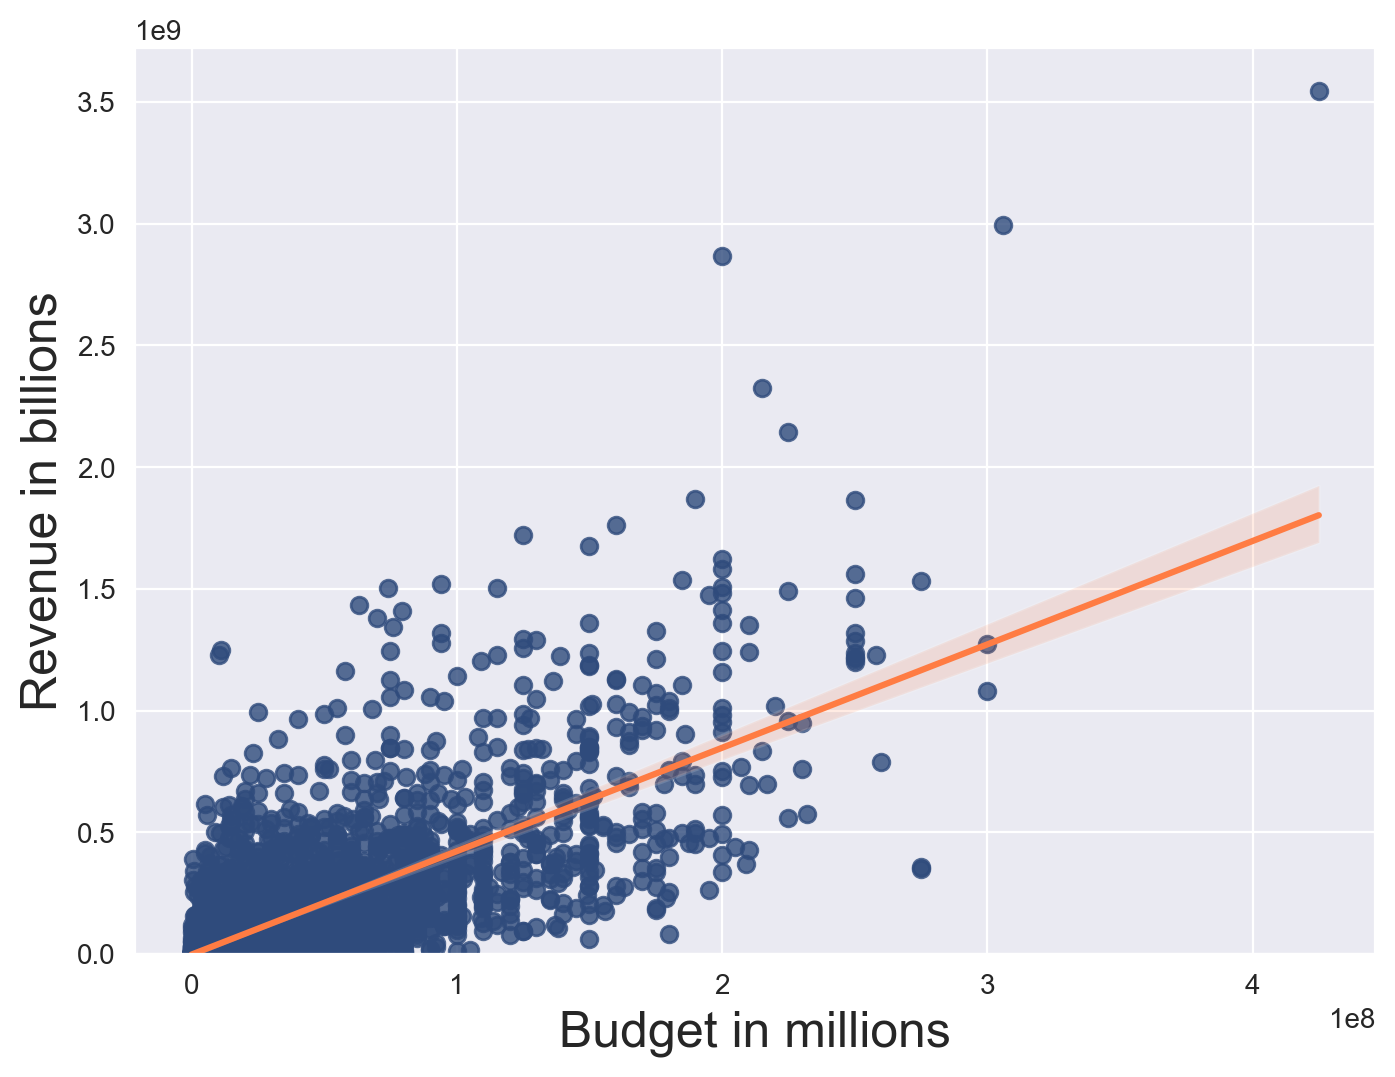

In [63]:
fig3_ax1.set_ylim(0, None)
fig3_ax1.set_xlabel('Budget in millions', fontsize=18)
fig3_ax1.set_ylabel('Revenue in billions', fontsize=18)
fig3

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

In [64]:
print(f'Data points for the new films align better with the linear regression than for older films.')
print(f'For newer films, it seems with budget of $150 million, each film could make around 600 millions or more,'
      f'but for older films, it seems with budget of $150 million, each film could make nearly $1 billion or more.')

Data points for the new films align better with the linear regression than for older films.
For newer films, it seems with budget of $150 million, each film could make around 600 millions or more,but for older films, it seems with budget of $150 million, each film could make nearly $1 billion or more.


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [65]:
regression = LinearRegression()
# Explanatory Variables or Features
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [66]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [67]:
# Theta 0
regression.intercept_

array([-8650768.00661042])

In [68]:
# Theta 1
regression.coef_

array([[3.12259592]])

### Instructor's note:
##### Both intercept_ and coef_ are simply attributes of the LinearRegression object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

##### How do we interpret the y-intercept? Literally, means that if a movie budget is 0 dollar, the estimated movie revenue is negative 8.65 million dollar. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

###### What about the slope? The slope tells us that for every extra 1 dollar in the budget, movie revenue increases by 3.1 dollar. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

In [69]:
# R-squared
regression.score(X, y)

0.5577032617720403

### Instructor's Note:
##### We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [71]:
X_old_films_df = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y_old_films_df = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [73]:
regression.fit(X_old_films_df, y_old_films_df)

LinearRegression()

In [75]:
'{:,.2f}'.format(regression.intercept_[0])

'22,821,538.64'

In [77]:
'{:,.2f}'.format(regression.coef_[0][0])

'1.65'

In [78]:
# R-squared
regression.score(X_old_films_df, y_old_films_df)

0.02937258620576877

### Instructor's Note:
##### Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [79]:
Hypothesis_j = regression.intercept_[0] + regression.coef_[0][0] * 350000000

In [81]:
print(f'Global revenue for our model for a film with a budget of $350 million is ${"{:,.2f}".format(Hypothesis_j)}.')

Global revenue for our model for a film with a budget of $350 million is $599,521,139.04.
